# Import libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import json
import time
import os
import math
from datetime import datetime

import sidetable 
from prettytable import PrettyTable

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns 

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# XGBOOST
import xgboost

# Sklearn library
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Helper functions
from src.utils.helper_functions import (
    auc_gini_score, 
    scale_and_prepare_data, 
    get_output,
    class_report_and_cm,
    run_grid_search
)

# Hint
from typing import List

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
path = '/Users/Adnan_Sevinc/Library/CloudStorage/OneDrive-EPAM/adnan_sevinc_personal/GitHub/loan_defaults_with_ML_methods/data'

In [3]:
X_train = pd.read_csv(os.path.join(path, 'X_train.csv'))

In [4]:
y_train = pd.read_csv(os.path.join(path, 'y_train.csv'))

In [5]:
X_test = pd.read_csv(os.path.join(path, 'X_test.csv'))

In [6]:
y_test = pd.read_csv(os.path.join(path, 'y_test.csv'))

In [7]:
data_size = {
    'X_train': {'Row': X_train.shape[0], 'Column': X_train.shape[1]},
    'y_train': {'Row': y_train.shape[0], 'Column': y_train.shape[1]},
    'X_test': {'Row': X_test.shape[0], 'Column': X_test.shape[1]},
    'y_test': {'Row': y_test.shape[0], 'Column': y_test.shape[1]}
}

data_size

{'X_train': {'Row': 52876, 'Column': 80},
 'y_train': {'Row': 52876, 'Column': 1},
 'X_test': {'Row': 188864, 'Column': 80},
 'y_test': {'Row': 188864, 'Column': 1}}

In [8]:
# Explore default rate for y_train
y_train.value_counts(normalize=True)

default
0          0.5
1          0.5
Name: proportion, dtype: float64

In [9]:
# Explore default rate for y_test
y_test.value_counts(normalize=True)

default
0          0.940004
1          0.059996
Name: proportion, dtype: float64

# Scale Dataset

In [10]:
X_train, X_test, y_train, y_test = scale_and_prepare_data(X_train, X_test, y_train, y_test)

# Modeling

## Logistic Regression

Build and fit Logistic Regression model

In [11]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [12]:
logistic_regression_model_output = get_output(logistic_regression_model,y_train, X_train, y_test, X_test)

In [13]:
logistic_regression_model_output

,Train_AUCROC,Test_AUCROC,Train_Gini,Test_Gini
0,0.76008,0.759007,0.52016,0.518013


Predict model

In [14]:
logistic_regression_model_pred = logistic_regression_model.predict(X_test)

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.75      0.85    177533
           1       0.16      0.77      0.27     11331

    accuracy                           0.75    188864
   macro avg       0.57      0.76      0.56    188864
weighted avg       0.93      0.75      0.81    188864

Display confusion matrix:

[[132889  44644]
 [  2612   8719]]


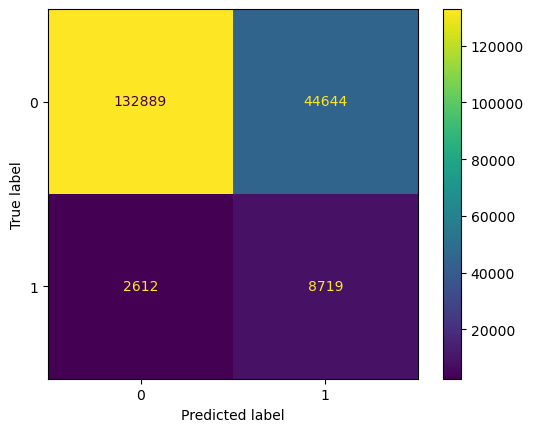

In [15]:
class_report_and_cm(y_test, logistic_regression_model_pred, logistic_regression_model)

## Decision Tree

Build and fit Decision Tree model

In [16]:
start = datetime.now()

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

print(f"Running Time: {(datetime.now()-start).total_seconds()/60}")

Running Time: 0.006615783333333333


In [17]:
decision_tree_model_output = get_output(decision_tree_model,y_train, X_train, y_test, X_test)

In [18]:
decision_tree_model_output

,Train_AUCROC,Test_AUCROC,Train_Gini,Test_Gini
0,1.0,0.670158,1.0,0.340316


Predict model

In [19]:
decision_tree_model_pred = decision_tree_model.predict(X_test)

Classification report:

              precision    recall  f1-score   support

           0       0.97      0.67      0.79    177533
           1       0.12      0.67      0.20     11331

    accuracy                           0.67    188864
   macro avg       0.54      0.67      0.50    188864
weighted avg       0.92      0.67      0.76    188864

Display confusion matrix:

[[119454  58079]
 [  3768   7563]]


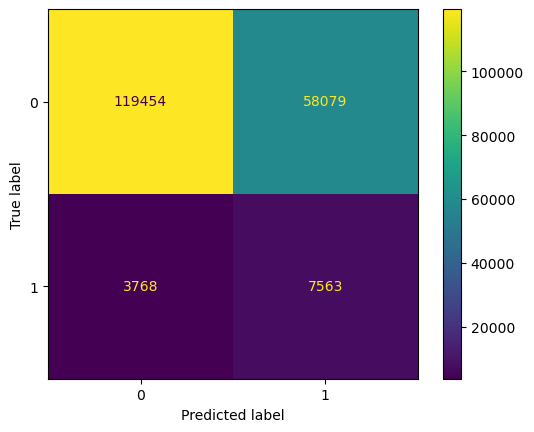

In [20]:
class_report_and_cm(y_test, decision_tree_model_pred, decision_tree_model)

# Random Forest

Build and fit Random Forest model

In [21]:
start = datetime.now()

random_forest_model = RandomForestClassifier(random_state=42)  
random_forest_model.fit(X_train, y_train)

print(f"Running Time: {(datetime.now()-start).total_seconds()/60}")

Running Time: 0.06617296666666667


In [22]:
random_forest_model_output = get_output(random_forest_model,y_train, X_train, y_test, X_test)

In [23]:
random_forest_model_output

,Train_AUCROC,Test_AUCROC,Train_Gini,Test_Gini
0,1.0,0.758728,1.0,0.517457


Predict Model

In [24]:
random_forest_model_pred = random_forest_model.predict(X_test)

Print score of Random Forest model

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.74      0.84    177533
           1       0.16      0.78      0.26     11331

    accuracy                           0.74    188864
   macro avg       0.57      0.76      0.55    188864
weighted avg       0.93      0.74      0.81    188864

Display confusion matrix:

[[130675  46858]
 [  2477   8854]]


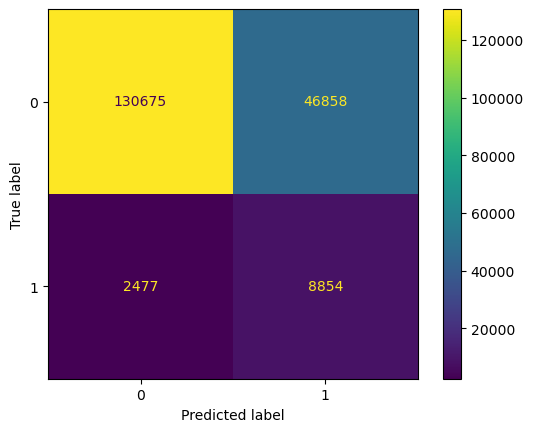

In [25]:
class_report_and_cm(y_test, random_forest_model_pred, random_forest_model)

# XGBoost

Build and fit XGBoost model

In [26]:
start = datetime.now()

xgboost_model = xgboost.XGBClassifier(seed=42, objective='binary:logistic')
xgboost_model.fit(X_train, y_train)

print(f"Running Time: {(datetime.now()-start).total_seconds()/60}")

Running Time: 0.007061799999999999


In [27]:
xgboost_model_output = get_output(xgboost_model,y_train, X_train, y_test, X_test)

In [28]:
xgboost_model_output

,Train_AUCROC,Test_AUCROC,Train_Gini,Test_Gini
0,0.812372,0.760401,0.624745,0.520803


Predict Model

In [29]:
xgboost_model_pred = xgboost_model.predict(X_test)

Classification report:

              precision    recall  f1-score   support

           0       0.98      0.73      0.84    177533
           1       0.16      0.79      0.26     11331

    accuracy                           0.74    188864
   macro avg       0.57      0.76      0.55    188864
weighted avg       0.93      0.74      0.81    188864

Display confusion matrix:

[[130423  47110]
 [  2423   8908]]


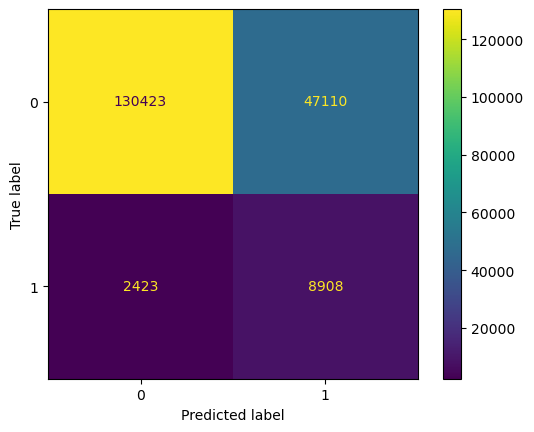

In [30]:
class_report_and_cm(y_test, xgboost_model_pred, xgboost_model)

# Conclusion

In [31]:
output_df = pd.concat(
    [logistic_regression_model_output,
    decision_tree_model_output,
    random_forest_model_output,
    xgboost_model_output
    ]
)
output_df.index = ["LR", "DT", "RF", "XGBoost"]

In [32]:
# Convert to % for better visibility and rounding
output_df.iloc[:,1:] = (output_df.iloc[:,1:] * 100).round(3)

# Sort values by Test_AUCROC
output_df.sort_values(by='Test_AUCROC', ascending=False)

,Train_AUCROC,Test_AUCROC,Train_Gini,Test_Gini
XGBoost,0.812372,76.040,62.474,52.080
LR,0.760080,75.901,52.016,51.801
RF,1.000000,75.873,100.000,51.746
DT,1.000000,67.016,100.000,34.032


In this study, the credit scoring models were built by employing logistic regression (LR), decision tree (DT), random forest (RF), and XGBoost on Freddie Mac Single-Family Loan-Level Dataset. 

The dataset was divided into a training set and a test set with 70% and 30% ratios, respectively.
Train and test sets were selected in a stratified and shuffled way with respect to the distribution of the dependent variable in order to  have equal case distribution. On the one hand, stratified sampling was used to make sure that the sample selected for the analysis was representative of the population regarding the distribution of the dependent variable. On the other hand, shuffled sampling was performed in order to make sure that the data points were assigned to the train and test sets at random In order to deal with
the imbalanced dataset problem we utilized the undersampling  technique. However, it is crucial to acknowledge that we are eliminating some information from the dataset by utilizing the undersampling technique.

The predictive performance of Logistic Regression, Decision Tree, Random Forest, and XGBoost models in predicting mortgage loan defaults  was evaluated using test AUC. These models were evaluated with their hyperparameters set to their default values to see how these models perform with default settings.

The XGBoost model yielded the highest AUC of 76.040%. However, the predictive performance of the models is slightly different from one another, except for the decision tree, which performed poorly in comparison to the other methods.

It's worth noting that the predictive performance of these models could be potentially improved with hyperparameter tuning and/or by implementing different sampling techniques to alleviate imbalances in the dataset such as oversampling (SMOTE) methods. In the ```algorithms_tuning.pynb``` notebook, we will perform hyperparameter tuning to see if we can boost the predictive power of these models.

Although machine learning methods demonstrate super performance, their opacity is a practical concern. The opacity of the machine learning method  is critical for decision-makers since they are required to provide clear and transparent justifications for their decisions. Because of these reasons, financial institutions, particularly banks, prefer to employ the logistic regression method due to its transparency, interpretability, and comprehensibility.